# Part II - Slide_deck
## by Alvens Abiola Akinkunmi

## Investigation Overview

> I will investigate the trends around the usage of Ford Go Bike for e.g effect of age distribution on user type, trip duration, what are the trends around usage of bikes during different days of a week, when are they used during the day, what type of rides do people use them for, etc.

## Dataset Overview 
>Ford GoBike System Dataset includes information about individual rides made in a bike-sharing system in **San Francisco Bay area in February, 2019**. The data set has been stored as a csv file, it has **16 fields and 183412 entries.**
 > The fields are:
 >  - User Type (Subscriber or Customer)
 >  - Bike ID
 >  - Member's Birth Year
 >  - Member's Gender
 >  - Ride Start Time
 >  - Trip Duration
 >  - Ride End Time
 >  - Start Station ID
 >  - Start Station Name
 >  - Start Station Latitude
 >  - Start Station Longitude
 >  - End Station ID
 >  - End Station Name
 >  - End Station Latitude
 >  - End Station Longitude

##### Import Necessary Packages and Load the dataset

In [1]:
### Import Important Packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
import calendar
import time

%matplotlib inline

#Do not truncate data in cells
pd.set_option('display.max_colwidth', None)

#Do not limit number of displayed columns
pd.set_option('display.max_columns', None)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Import the dataset
bike_df = pd.read_csv('fordgobike_trip_data.csv')

In [3]:
bike_df.head(4).T

,0,1,2,3
duration_sec,52185,42521,61854,36490
start_time,2019-02-28 17:32:10.1450,2019-02-28 18:53:21.7890,2019-02-28 12:13:13.2180,2019-02-28 17:54:26.0100
end_time,2019-03-01 08:01:55.9750,2019-03-01 06:42:03.0560,2019-03-01 05:24:08.1460,2019-03-01 04:02:36.8420
start_station_id,21,23,86,375
start_station_name,Montgomery St BART Station (Market St at 2nd St),The Embarcadero at Steuart St,Market St at Dolores St,Grove St at Masonic Ave
start_station_latitude,37.7896,37.7915,37.7693,37.7748
start_station_longitude,-122.401,-122.391,-122.427,-122.447
end_station_id,13,81,3,70
end_station_name,Commercial St at Montgomery St,Berry St at 4th St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St
end_station_latitude,37.7942,37.7759,37.7864,37.7733


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bike_df.shape

(183412, 16)

In [6]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
bike_df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [8]:
bike_df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
bike_df['bike_id'].value_counts()

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
5647      1
3655      1
1194      1
3114      1
5891      1
Name: bike_id, Length: 4646, dtype: int64

In [10]:
bike_df.duplicated().sum()

0

##### Data Wrangling
>First, I will make a copy of the original dataset, the look at the general fields of the dataset to remove any null values and duplicates, convert some columns to more appropriate types, remove any unrequires columns and add new columns needed for analysis. This will be done to make the dataset tidy and clean

In [11]:
#make a copy of the original dataset
bike_df_clean = bike_df.copy()

###### Clean the time
> Format the datatype for the start time, end time and also calculate different day time from these fields

In [12]:
bike_df_clean['start_time'] = pd.to_datetime(bike_df_clean['start_time'])
bike_df_clean['end_time'] = pd.to_datetime(bike_df_clean['end_time'])

In [13]:
#add a derived column for day of the week
bike_df_clean['day_of_week'] = bike_df_clean.apply(lambda row: row.start_time.day_name(), axis = 1)

In [14]:
#convert different hours of the day to day time
def getTimeOfDay(time):
    hour = time.hour
    if hour > 16 and hour <= 19:
        return 'Evening'
    if hour > 0 and hour < 6 and hour > 19 and hour < 23:
        return 'Night'
    if hour >= 6 and hour < 12:
        return 'Morning'
    if hour >= 12 and hour <= 16:
        return 'Afternoon'

In [15]:
# create a column for day time i.e evening/afternoon/evening/night
bike_df_clean['day_time'] = bike_df_clean['start_time'].apply(lambda time: getTimeOfDay(time))

###### Clean the IDs
>convert all IDs to correct data type

In [16]:
bike_df_clean['bike_id'] = bike_df_clean['bike_id'].apply(str)
bike_df_clean['start_station_id'] = bike_df_clean['start_station_id'].apply(str)
bike_df_clean['end_station_id'] = bike_df_clean['end_station_id'].apply(str)

In [17]:
bike_df_clean['bike_id'], bike_df_clean['start_station_id'], bike_df_clean['end_station_id']

(0         4902
 1         2535
 2         5905
 3         6638
 4         4898
           ... 
 183407    4832
 183408    4960
 183409    3824
 183410    5095
 183411    1057
 Name: bike_id, Length: 183412, dtype: object,
 0          21.0
 1          23.0
 2          86.0
 3         375.0
 4           7.0
           ...  
 183407     27.0
 183408     21.0
 183409    278.0
 183410    220.0
 183411     24.0
 Name: start_station_id, Length: 183412, dtype: object,
 0          13.0
 1          81.0
 2           3.0
 3          70.0
 4         222.0
           ...  
 183407    324.0
 183408     66.0
 183409    277.0
 183410    216.0
 183411     37.0
 Name: end_station_id, Length: 183412, dtype: object)

###### Calculate Age of Bikers
>Check for empty and null entries, then drop them. Also, calculate the age of each biker

In [18]:
#Drop all rows that are NaN
no_gender_birth = bike_df_clean.dropna()
no_gender_birth.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
day_of_week                0
day_time                   0
dtype: int64

In [19]:
bike_df_clean['age'] = bike_df_clean['member_birth_year'].apply(lambda x: 2019 - x)

In [20]:
bike_df_clean['age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

##### Convert Longitude and Latitude to distance in kilometer

In [21]:
def calculateDistance(row):
    lat1 = row['start_station_latitude']
    lon1 = row['start_station_longitude']
    lat2 = row['end_station_latitude']
    lon2 = row['end_station_longitude']
    radius = 6371 # km radius of earth
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [22]:
bike_df_clean['distance'] = bike_df_clean.apply(lambda row: calculateDistance(row), axis=1)

In [23]:
#test
bike_df_clean.distance.head()

0    0.544709
1    1.742999
2    2.704545
3    0.260739
4    2.409301
Name: distance, dtype: float64

In [24]:
#Drop the unneeded columns
ncols = ['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','member_birth_year','start_station_id',
       'start_station_name','end_station_id','end_station_name','start_time', 'end_time']
bike_df_clean.drop(ncols, axis=1, inplace=True)

##### Rename the duration column

In [25]:
bike_df_clean.rename(columns= {'duration_sec':'trip_duration'}, inplace=True)

In [26]:
#Test
bike_df_clean.columns

Index(['trip_duration', 'bike_id', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'day_of_week', 'day_time', 'age',
       'distance'],
      dtype='object')

In [27]:
bike_df_clean.dropna(axis=0, inplace=True)

In [28]:
bike_df_clean.isna().sum()

trip_duration              0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
day_of_week                0
day_time                   0
age                        0
distance                   0
dtype: int64

In [29]:
bike_df_clean.describe()

,trip_duration,age,distance
count,157129.000000,157129.000000,157129.000000
mean,704.435629,34.448014,1.707600
std,1570.732430,10.157108,1.100320
min,61.000000,18.000000,0.000000
25%,328.000000,27.000000,0.929684
50%,517.000000,32.000000,1.446390
75%,795.000000,39.000000,2.246869
max,84548.000000,141.000000,69.469241


In [30]:
bike_df_clean.head()

,trip_duration,bike_id,user_type,member_gender,bike_share_for_all_trip,day_of_week,day_time,age,distance
0,52185,4902,Customer,Male,No,Thursday,Evening,35.0,0.544709
2,61854,5905,Customer,Male,No,Thursday,Afternoon,47.0,2.704545
3,36490,6638,Subscriber,Other,No,Thursday,Evening,30.0,0.260739
199,15123,5380,Subscriber,Male,No,Thursday,Evening,39.0,2.776930
297,13061,5830,Subscriber,Male,No,Thursday,Evening,32.0,0.000000


In [31]:
bike_df_clean.shape

(157129, 9)

In [32]:
#Save the clean dataset
bike_df_clean.to_csv('bike_clean')

### What is the structure of your dataset?

> There are **157,129 trips** in the dataset with information about the duration of each trip in seconds, and also information about the user (type, gender). The dataset contains **9 fields (columns); 4 nominal (member_gender, day_of_week, day_time and bike_id), 3 numeric(trip_duration, age and distance), and 2 binary (user_type and bike_share_for_all_trip)**.

### What is/are the main feature(s) of interest in your dataset?

> I'm inrterested in understanding the impact of age and gender on trip duration and distance covered

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the duration of the trip is mostly affected by the gender and age of the user, also the day of the week and period of the day. I think the most important features will be the trip_duration, bike_id, user_type, member_gender, bike_share_for_all_trip, day_of_week, day_time, age and distance

## UNIVARIATE EXPLORATION
> In this section, I will investigate distributions of individual variables. I will also prepare to look at relationships between variables.

In [33]:
#Define the Function for the plots
def myCountPlot(bike_df_clean, xVar, hueVar=None,color=0,palette=None,order=None):
    # set plot dimenions
    plt.figure(figsize=[13,4])
    # plot
    sb.countplot(data=bike_df_clean, x=xVar, hue=hueVar, color = sb.color_palette()[color], palette=palette, order=order, edgecolor='black')
    # After plotting, clean the variable names
    xVar=xVar.replace('_'," ") #replace _ with a space
    if hueVar:
        hueVar=hueVar.replace('_',' ')
    # Add title and format it
    plt.title(f'''Distribution of {xVar} {'by' if hueVar else ''} {hueVar if hueVar else ''}'''.title(), fontsize = 14, weight ='bold')
    # Add x label and format it
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    # Add y label and format it
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')

In [34]:
# categories in order
time_order = ['Morning', 'Afternoon', 'Evening']
day_order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
color = sb.color_palette()[0]

##### Q1. Top 15 Ridden Bike ID Distribution

In [35]:
bike_id_count= bike_df_clean['bike_id'].value_counts()[0:15]

In [36]:
print(bike_id_count)

4794    161
4814    157
4450    151
5145    150
4422    149
4812    149
5048    149
5286    148
5482    148
5325    147
4923    146
4956    146
4834    146
5175    146
5351    145
Name: bike_id, dtype: int64


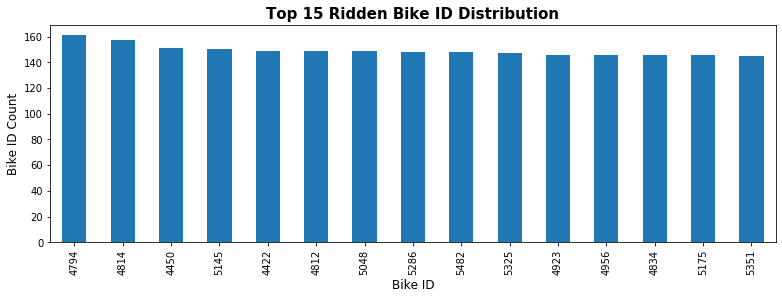

In [37]:
plt.figure(figsize=[13,4])
bike_id_count.plot(kind='bar', align='center')
plt.ylabel('Bike ID Count', size=12)
plt.xlabel('Bike ID', size=12)
plt.title('Top 15 Ridden Bike ID Distribution', fontweight='bold',size=15);

 > From the visualization, a bike with id number **4794** is driven the most with a score of around **161**.

##### Q2. Total Trip Duration

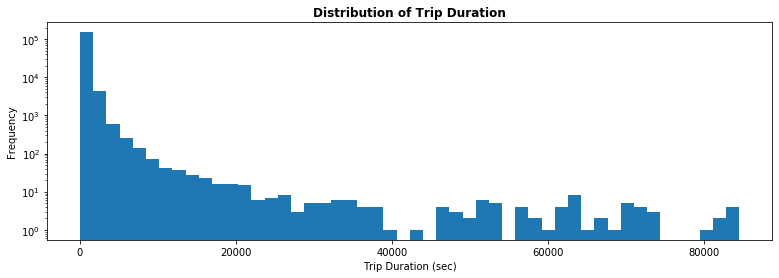

In [38]:
# Getting counts of each bike
plt.figure(figsize=[13,4])
bike_df_clean.trip_duration.hist(bins=50, log=True)
plt.grid(b=None)
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration', fontweight='bold');

> It was observed that most trips are **less than 40000 seconds** long.

##### Q3. Total Distance covered

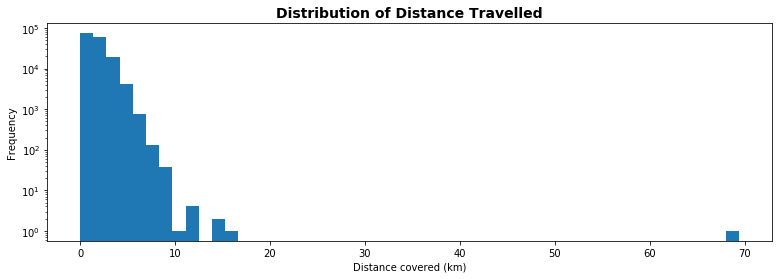

In [39]:
plt.figure(figsize=[13,4])
bike_df_clean.distance.hist(bins=50, log=True)
plt.grid(b=None)
plt.xlabel('Distance covered (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Distance Travelled', fontweight='bold', fontsize=14);

> It could be observed that most of the trips travelled by users are **less than 10km** with an outlier of almost about 70km travelled

##### Q4. User Type Distribution

In [40]:
user = bike_df_clean['user_type'].value_counts()

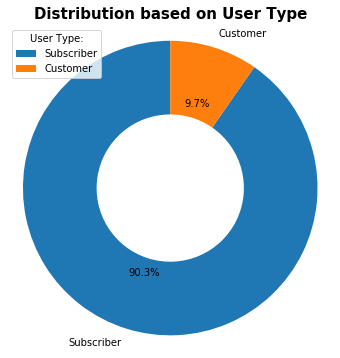

In [48]:
plt.figure(figsize=[6,6])
plt.pie(data=bike_df_clean, x=user, labels = user.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.5})
plt.axis('square')
plt.title('Distribution based on User Type',fontweight='bold',fontsize=15)
plt.legend(title='User Type:');

> There are more subcribers with approximately **90%** of the total bikers

##### Q5. Member Gender Distribution

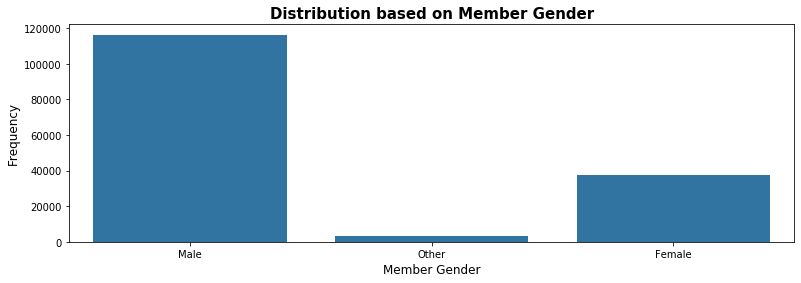

In [42]:
plt.figure(figsize=[13,4])
sb.countplot(data=bike_df_clean,x='member_gender',color=color)
plt.xlabel('Member Gender', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Distribution based on Member Gender', fontweight='bold',fontsize=15);

In [43]:
bike_df_clean['member_gender'].value_counts()

Male      116263
Female     37649
Other       3217
Name: member_gender, dtype: int64

> There are more male gender in the total population of bikers with total of **116,263**, followed by the female gender

##### Q6. Number of Members by Period of the Day

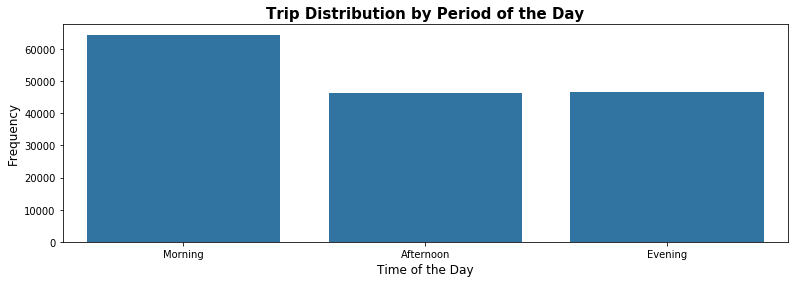

In [46]:
plt.figure(figsize=[13,4])
sb.countplot(data=bike_df_clean,x='day_time',color=color, order=time_order)
plt.xlabel('Time of the Day',size=12)
plt.ylabel('Frequency',size=12)
plt.title('Trip Distribution by Period of the Day',fontweight='bold',size=15);

In [49]:
bike_df_clean['day_time'].value_counts()

Morning      64445
Evening      46486
Afternoon    46198
Name: day_time, dtype: int64

> From the visualization above, more trips were made in the morning with a total of **64,445** trips

##### Q7. Distribution of Bike Sharing for all trip

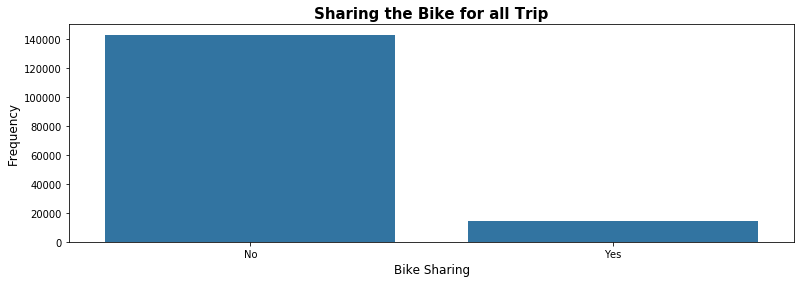

In [50]:
plt.figure(figsize=[13,4])
sb.countplot(data=bike_df_clean,x='bike_share_for_all_trip',color=color)
plt.xlabel('Bike Sharing',size=12)
plt.ylabel('Frequency',size=12)
plt.title('Sharing the Bike for all Trip',size=15,fontweight='bold');

> There were less bike shared for the all trips. Most of the bikers didn't share their bikes for the trip

### Age Distribution of Bikers
From the below plot,
> Most of the bikers are between the age of **20 and 45 years old**

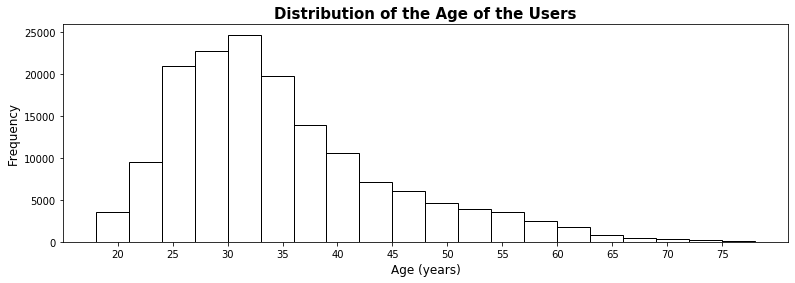

In [51]:
bins=np.arange(18,81,3)
plt.figure(figsize=[13,4])
ax=plt.hist(data=bike_df_clean,x='age',bins=bins, fill=False)
plt.xticks(np.arange(20,80,5))
plt.xlabel('Age (years)',size=12)
plt.ylabel('Frequency', size=12)
plt.title('Distribution of the Age of the Users',size=15, fontweight='bold');

##### Q9. Distribution by Day of the Week

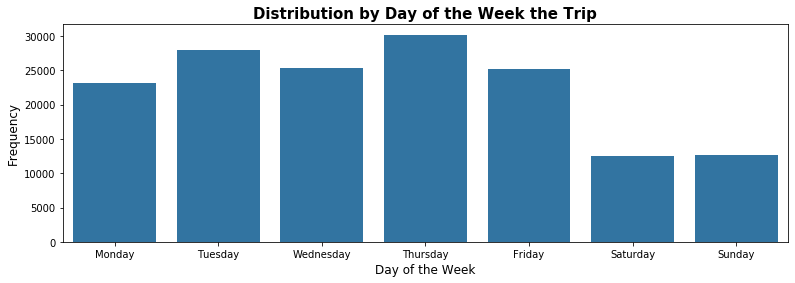

In [52]:
plt.figure(figsize=[13,4])
sb.countplot(data=bike_df_clean, x='day_of_week',color=color, order=day_order)
plt.xlabel('Day of the Week',size=12)
plt.ylabel('Frequency',size=12)
plt.title('Distribution by Day of the Week the Trip',size=15, fontweight='bold');

> Most of the trips were made on **Thursdays**. Also, it seems people don't ride on weekends

## Univariate Exploration Summary

>   - Most of the aspect of the data collected are clean and tidy
>   - Though it's mostly cleaned data, it has outliers in some numeric features like age and distance

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  - Regarding the Duration, the curve of the duration is right skewed.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - Most users are 20-45 years old. The age distribution is right skewed
> - Most users are subscribers, males and didn't share the bike for all trip. Most trips were also made on Thursdays
> - I removed the null values, converted start and end time to datetime and removed the unrequired columns, also had to calculate the distance convered by using the longitudinal and latitudinal locations

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the dataset.

In [53]:
bike_df_clean.groupby('member_gender').count().sort_values('user_type',ascending=False)

,trip_duration,bike_id,user_type,bike_share_for_all_trip,day_of_week,day_time,age,distance
member_gender,,,,,,,,
Male,116263,116263,116263,116263,116263,116263,116263,116263
Female,37649,37649,37649,37649,37649,37649,37649,37649
Other,3217,3217,3217,3217,3217,3217,3217,3217


##### Q1. Correlation Matrix

In [54]:
bike_df_clean[['trip_duration','age','distance']].corr()

,trip_duration,age,distance
trip_duration,1.000000,0.006387,0.150522
age,0.006387,1.000000,0.013048
distance,0.150522,0.013048,1.000000


> Theres really no correlation between these variables in the table

##### Member Gender vs Trip Distance

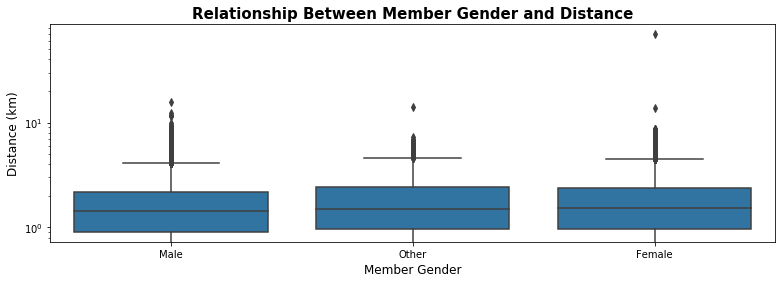

In [55]:
plt.figure(figsize=[13,4])
sb.boxplot(data=bike_df_clean,x='member_gender',y='distance',color=color)
plt.yscale('log')
plt.xlabel('Member Gender',size=12)
plt.ylabel('Distance (km)',size=12)
plt.title('Relationship Between Member Gender and Distance', fontweight='bold',size=15);

> More male riders cover longer distance

##### Q3. Relationship Between User Type and Trip Duration

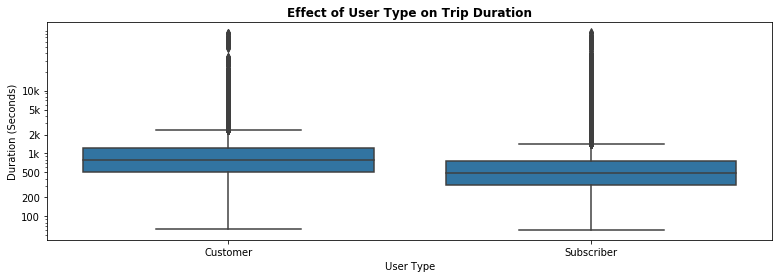

In [56]:
plt.figure(figsize=[13,4])
sb.boxplot(data=bike_df_clean,x='user_type',y='trip_duration',color=color)
plt.xlabel('User Type')
plt.ylabel('Duration (Seconds)')
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3,10e3]
y_ticklabels=['100','200','500','1k','2k','5k','10k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.title('Effect of User Type on Trip Duration', fontweight='bold');

> More Customers spent more time riding compared to the subscibers

### Relationship Between Gender and Bike Sharing

>The chart above shows that all member genders didn't share their bikes during trip

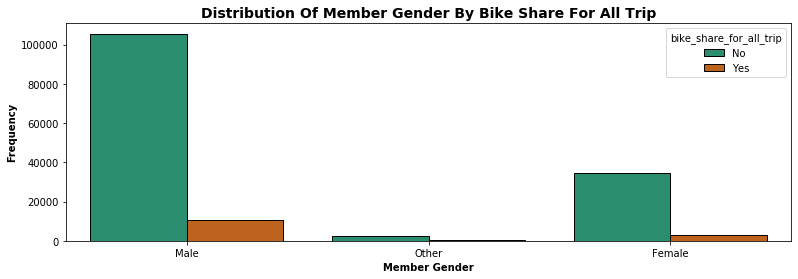

In [57]:
myCountPlot(bike_df_clean,'member_gender',hueVar='bike_share_for_all_trip', palette='Dark2')

### Relationship Between Gender and User Type

> All genders are more of a subscriber than a customer

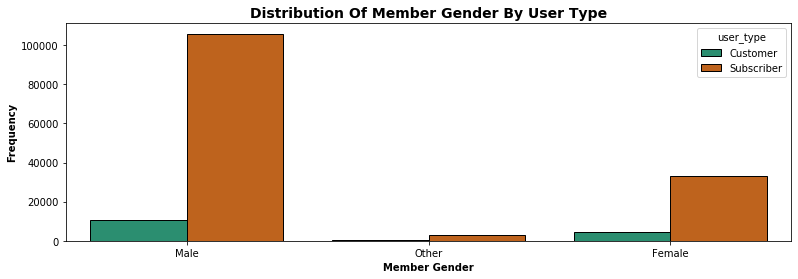

In [58]:
myCountPlot(bike_df_clean,'member_gender',hueVar='user_type', palette='Dark2')

### Relationship between User Type and Bike Share
From the plot below,
>Most subscribers didn't share their bikes during their trips, and customers didnt share their bikes at all

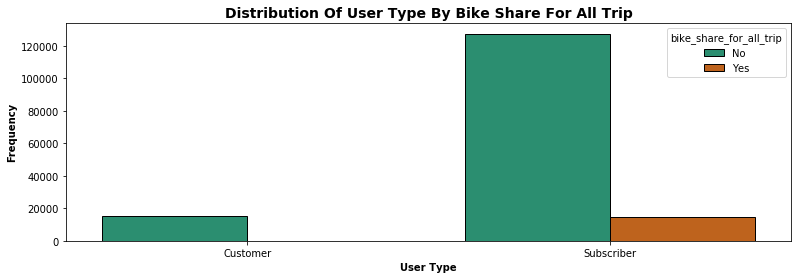

In [59]:
myCountPlot(bike_df_clean,'user_type',hueVar='bike_share_for_all_trip', palette='Dark2')

##### Q7. Relationship between User Type and Age

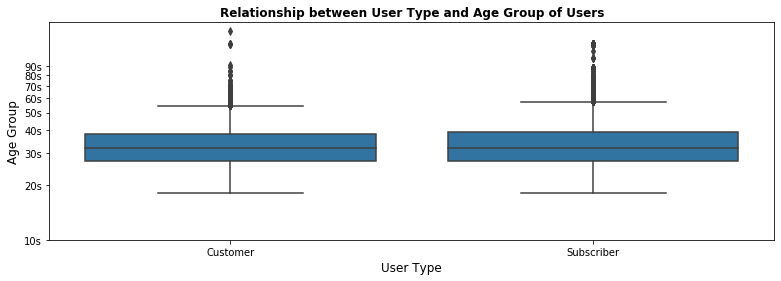

In [60]:
plt.figure(figsize=[13,4])
sb.boxplot(data=bike_df_clean,x='user_type',y='age',color=color)
plt.xlabel('User Type', size=12)
plt.ylabel('Age Group', size=12)
plt.yscale('log')
y_ticklocs=[10,20,30,40,50,60,70,80,90]
y_ticklabels=['10s','20s','30s','40s','50s','60s','70s','80s','90s']
plt.yticks(y_ticklocs,y_ticklabels)
plt.title('Relationship between User Type and Age Group of Users', fontweight='bold');

> It could be concluded that most of both the subcribers and customers are within their late 20s, 30s and early 40s. Mean of under 40 years old

### Relationship Between Member Gender and Day of the Week
> From the plot below, it shows that most of the riders are either male or female and ride mostly during weekdays

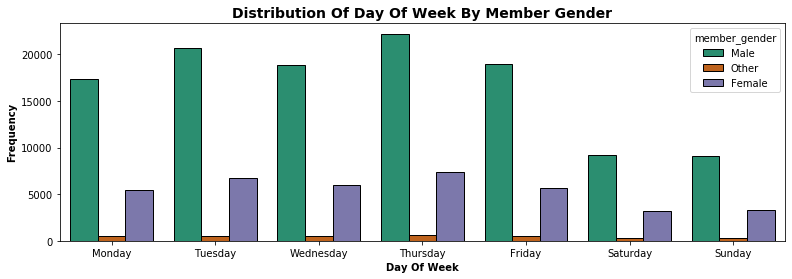

In [61]:
myCountPlot(bike_df_clean,'day_of_week',hueVar='member_gender', palette='Dark2', order=day_order)

### Relationship Between Member Gender and Day Time

From the figure below:

> For male riders, it shows that they ride more in the morning, followed by evening and then least in the afternoon

> For female and the other gender, it shows that they ride more in the morning, followed by afternoon and then least in the evening

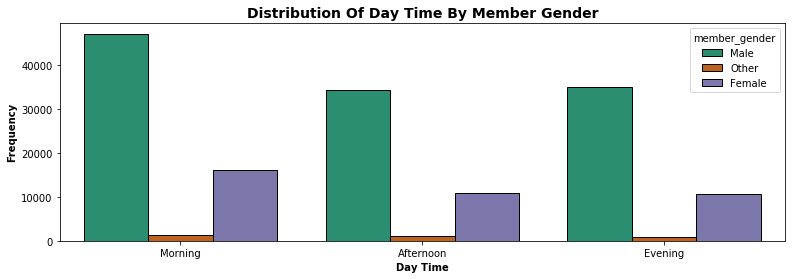

In [62]:
myCountPlot(bike_df_clean,'day_time',hueVar='member_gender', palette='Dark2', order=time_order)

### Relationship Between User Type and Day of the Week
> The figure below shows that there were more subscriber bikers riding during the weekdays than weekends

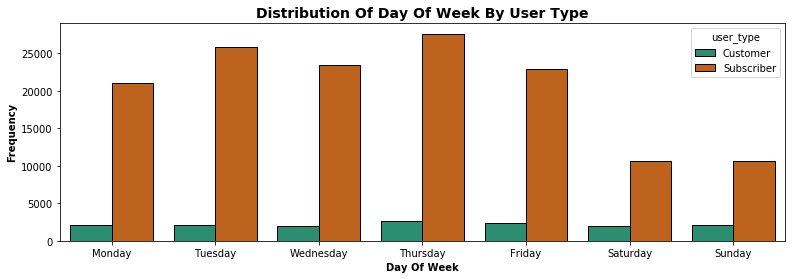

In [63]:
myCountPlot(bike_df_clean,'day_of_week',hueVar='user_type', palette='Dark2', order=day_order)

### Relationship Between Day Time and User Type
> For subscribers, they tend to ride more in the morning than in the evening than in the afternoon
>For customers, they tend to ride more in the Afternoon than in the morning than in the evening

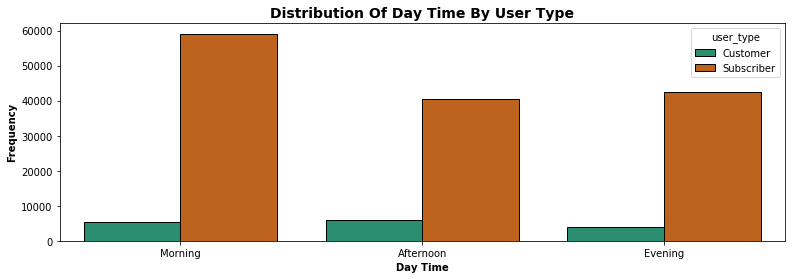

In [64]:
myCountPlot(bike_df_clean,'day_time',hueVar='user_type', palette='Dark2', order=time_order)

##### Relationship Between Day Time and Day of the Week

> The plot above shows a confirmation of high trip made during the weekdays irrespective of the period of the day

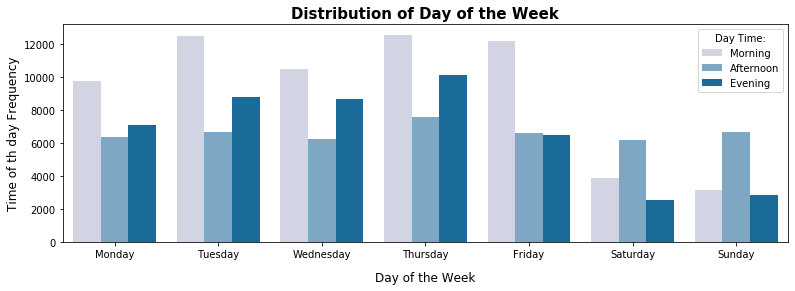

In [71]:
plt.figure(figsize=[13,4])
sb.countplot(data=bike_df_clean,x='day_of_week',hue='day_time', order=day_order, hue_order=time_order, palette='PuBu')
plt.xlabel('Day of the Week', size=12, labelpad=12)
plt.ylabel('Time of th day Frequency', size=12)
plt.legend(title='Day Time:')
plt.title('Distribution of Day of the Week', fontweight='bold',fontsize=15);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - The duration of the trip is inversely related to the age. The younger the user, the longer the trip.
> - Males tend to have shorter trips than females.
> - Users who share the bike for all trip have shorter trips than those who don't.
> - Subscribers tend to have longer trips than customers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Most users who share bikes are in the twenties of age.
> - Bike sharing occurs only by subscribers which is intuitive.

## MULTIVARIATE EXPLORATION

##### Q1. Correlation between Age, Gender and Bike Sharing

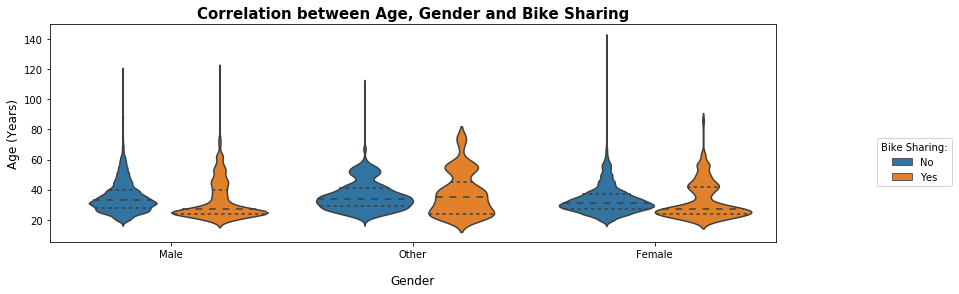

In [65]:
plt.figure(figsize=[13,4])
sb.violinplot(data=bike_df_clean,x='member_gender',y='age',hue='bike_share_for_all_trip',inner='quartile')
plt.xlabel('Gender', labelpad=15,size=12)
plt.ylabel('Age (Years)', size=12)
plt.title('Correlation between Age, Gender and Bike Sharing', fontweight='bold', size=15)
plt.legend(title='Bike Sharing:', bbox_to_anchor=(1.25,0.5));

> Bike sharing is associated with younger bikers across all genders

##### Q2. Correlation between Age, Gender and User Type

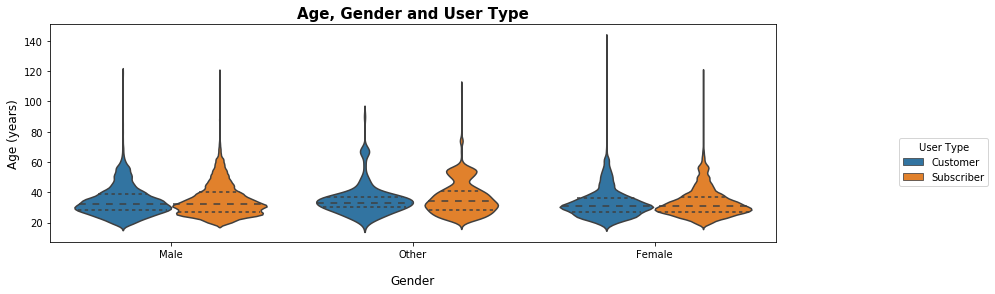

In [66]:
plt.figure(figsize=[13,4])
sb.violinplot(data=bike_df_clean,x='member_gender',y='age',hue='user_type',inner='quartile')
plt.xlabel('Gender', labelpad=15, size=12)
plt.ylabel('Age (years)', size=12)
plt.title('Age, Gender and User Type', fontweight='bold', size=15)
plt.legend(title='User Type', bbox_to_anchor=(1.3,0.5));

> User Type is not related with neither gender nor age

##### Q3. Correlation between Day time, trip duration and user type

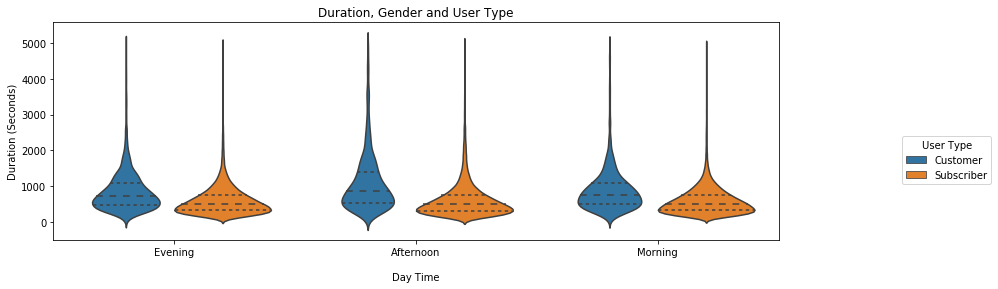

In [68]:
plt.figure(figsize=[13,4])
sb.violinplot(data=bike_df_clean.query('trip_duration<trip_duration.quantile(0.995)'),x='day_time',y='trip_duration',hue='user_type',inner='quartile')
plt.xlabel('Day Time', labelpad=15)
plt.ylabel('Duration (Seconds)')
plt.title('Duration, Gender and User Type')
plt.legend(title='User Type', bbox_to_anchor=(1.3,0.5));

> The plot above shows that Subcribers rode less time (shorter trip duration) irrespective of the day time

### Multivariate Summary:

> Most of the insights derived were just as gotten from the other types of exploaration (Univariate and Bivariate), so they are confirmations to insights from other sessions.

## Conclusion

> I was able to use all three types of exploration: univariate, bivariate, and multivariate to explore the dataset and derive insights.

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt